In [2]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

In [1]:
%pip install pylab
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['459569b5-1657-429c-a670-39ada46e8dde.csv']), delimiter = ';')
df.head()

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



ERROR: Could not find a version that satisfies the requirement pylab (from versions: none)
ERROR: No matching distribution found for pylab


NameError: name 'uploaded' is not defined

In [4]:
columns_to_keep = [col for col in df.columns if col not in ['product', 'timestamp']]

# Pivot the DataFrame
df_pivoted = df.pivot_table(index='timestamp', columns='product', values=columns_to_keep, aggfunc='mean')

# Combine the level names with the product names
df_pivoted.columns = ['_'.join(col).strip() for col in df_pivoted.columns.values]

# Reset the index if you want 'timestamp' back as a column
df_pivoted.reset_index(inplace=True)

# Display the head of the pivoted DataFrame
df_pivoted

,timestamp,ask_price_1_AMETHYSTS,ask_price_1_STARFRUIT,ask_price_2_AMETHYSTS,ask_price_2_STARFRUIT,ask_price_3_AMETHYSTS,ask_price_3_STARFRUIT,ask_volume_1_AMETHYSTS,ask_volume_1_STARFRUIT,ask_volume_2_AMETHYSTS,...,bid_volume_2_AMETHYSTS,bid_volume_2_STARFRUIT,bid_volume_3_AMETHYSTS,bid_volume_3_STARFRUIT,day_AMETHYSTS,day_STARFRUIT,mid_price_AMETHYSTS,mid_price_STARFRUIT,profit_and_loss_AMETHYSTS,profit_and_loss_STARFRUIT
0,0,10004,5003,10005.0,NaN,NaN,NaN,2,31,29.0,...,2.0,31.0,29.0,NaN,-2,-2,10003.0,5002.5,0.0,0.000000
1,100,10004,5003,10005.0,5004.0,NaN,NaN,2,2,22.0,...,22.0,NaN,NaN,NaN,-2,-2,10000.0,5000.0,2.0,1.925293
2,200,10005,5003,NaN,NaN,NaN,NaN,20,20,NaN,...,NaN,20.0,NaN,NaN,-2,-2,10000.0,5000.0,-6.0,2.134766
3,300,10004,5003,10005.0,NaN,NaN,NaN,2,31,29.0,...,29.0,NaN,NaN,NaN,-2,-2,10000.0,4999.5,-6.0,-3.100586
4,400,10004,5002,10005.0,NaN,NaN,NaN,2,27,25.0,...,25.0,NaN,NaN,NaN,-2,-2,10000.0,4998.5,-14.0,-0.179688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,199500,10004,4956,10005.0,NaN,NaN,NaN,1,23,22.0,...,1.0,NaN,22.0,NaN,-2,-2,10003.0,4952.5,-48.0,908.226562
1996,199600,10002,4956,10004.0,NaN,10005.0,NaN,7,22,1.0,...,21.0,NaN,NaN,NaN,-2,-2,9999.0,4952.5,-48.0,911.500000
1997,199700,10004,4956,10005.0,NaN,NaN,NaN,2,27,25.0,...,2.0,NaN,25.0,NaN,-2,-2,10001.0,4952.5,-48.0,910.929688
1998,199800,10002,4956,10005.0,NaN,NaN,NaN,8,21,21.0,...,NaN,NaN,NaN,NaN,-2,-2,9998.5,4952.5,-48.0,904.429688


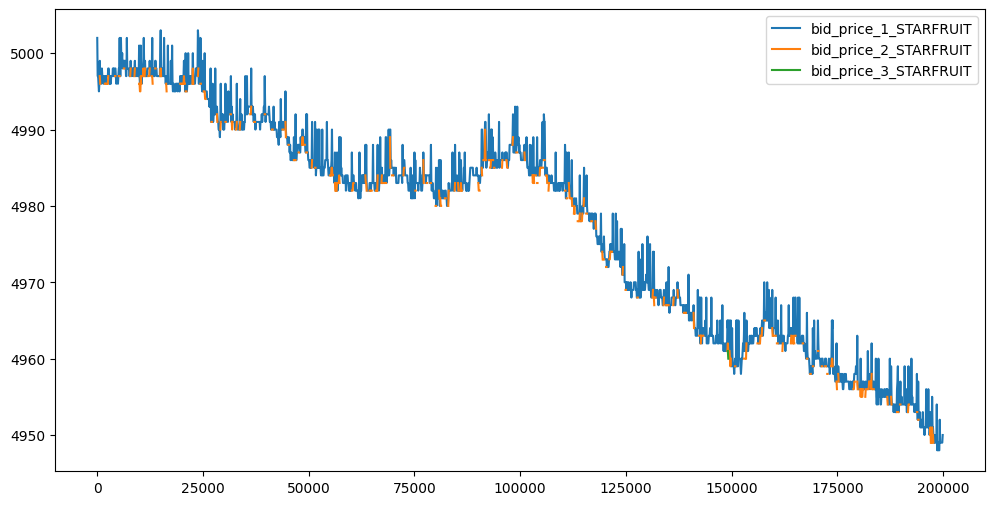

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

plt.plot(df_pivoted['timestamp'], df_pivoted['bid_price_1_STARFRUIT'], label='bid_price_1_STARFRUIT')
plt.plot(df_pivoted['timestamp'], df_pivoted['bid_price_2_STARFRUIT'], label='bid_price_2_STARFRUIT')
plt.plot(df_pivoted['timestamp'], df_pivoted['bid_price_3_STARFRUIT'], label='bid_price_3_STARFRUIT')
plt.legend()

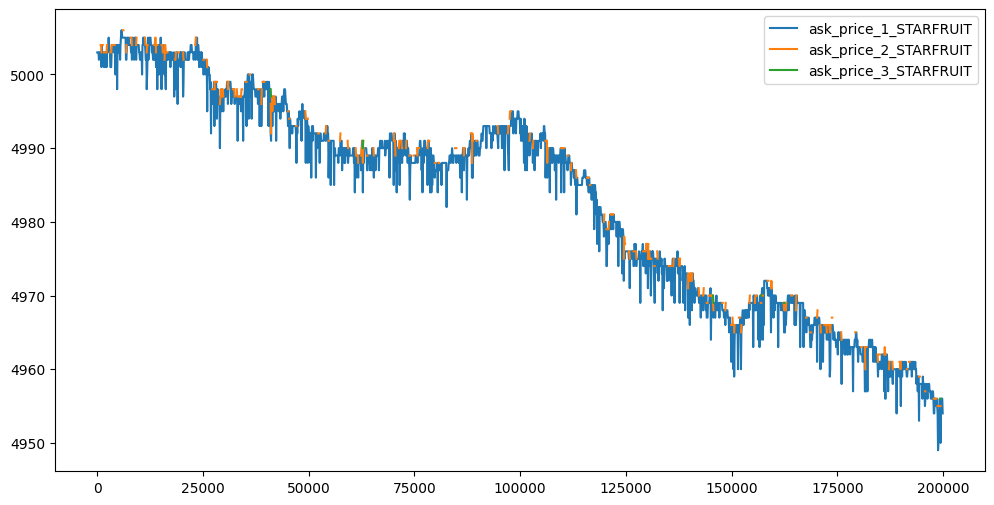

In [8]:
plt.plot(df_pivoted['timestamp'], df_pivoted['ask_price_1_STARFRUIT'], label='ask_price_1_STARFRUIT')
plt.plot(df_pivoted['timestamp'], df_pivoted['ask_price_2_STARFRUIT'], label='ask_price_2_STARFRUIT')
plt.plot(df_pivoted['timestamp'], df_pivoted['ask_price_3_STARFRUIT'], label='ask_price_3_STARFRUIT')
plt.legend()

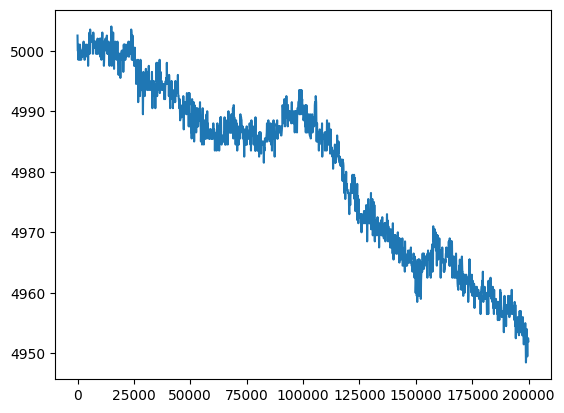

In [15]:
plt.plot(df_pivoted['timestamp'], df_pivoted['mid_price_STARFRUIT'], label='mid_price_STARFRUIT')

In [24]:
y = df_pivoted[["timestamp","mid_price_STARFRUIT"]]
mid_price_sf_nacheck = y['mid_price_STARFRUIT'].isna().sum()

print(f"Number of NA values in column '{'mid_price_STARFRUIT'}': {mid_price_sf_nacheck}")

Number of NA values in column 'mid_price_STARFRUIT': 0


In [29]:
y.squeeze()
y.set_index("timestamp", inplace = True)
y

,mid_price_STARFRUIT
timestamp,
0,5002.5
100,5000.0
200,5000.0
300,4999.5
400,4998.5
...,...
199500,4952.5
199600,4952.5
199700,4952.5


In [62]:
split_index = int(len(y) * 0.8)

train_data = y.iloc[:split_index]
test_data = y.iloc[split_index:]

print("Train Data shape:")
print(train_data.shape)
print("\nTest Data shape:")
print(test_data.shape)

Train Data shape:
(1600, 1)

Test Data shape:
(400, 1)


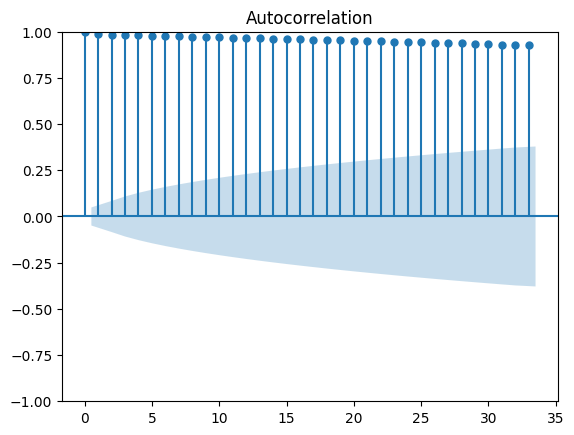

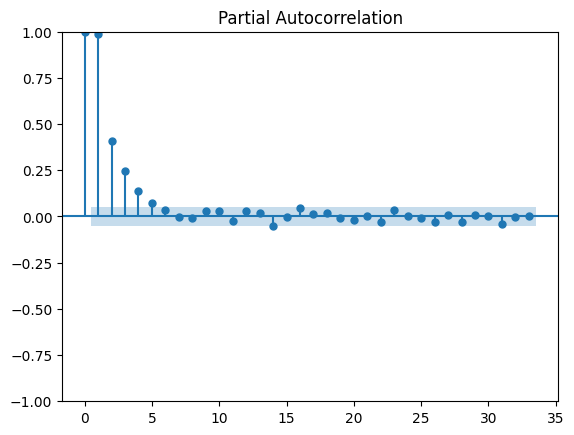

In [63]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # stationary check
acf_original = plot_acf(train_data)

pacf_original = plot_pacf(train_data)

In [65]:
from statsmodels.tsa.stattools import adfuller


adf_test = adfuller(train_data, autolag = 'AIC')


print("1. ADF: ", adf_test[0])
print("2. p-value: ", adf_test[1])
print("3. Num of Lags: ", adf_test[2])
print("4. Num of observations used for ADF :", adf_test[3])
print("5. Critical value: ")
for key, val in adf_test[4].items():
  print("\t", key, ": ", val)

1. ADF:  -0.2990659056221143
2. p-value:  0.925636523778323
3. Num of Lags:  9
4. Num of observations used for ADF : 1590
5. Critical value: 
	 1% :  -3.4344694268256246
	 5% :  -2.863359483478656
	 10% :  -2.5677386582809225


<Axes: xlabel='timestamp'>

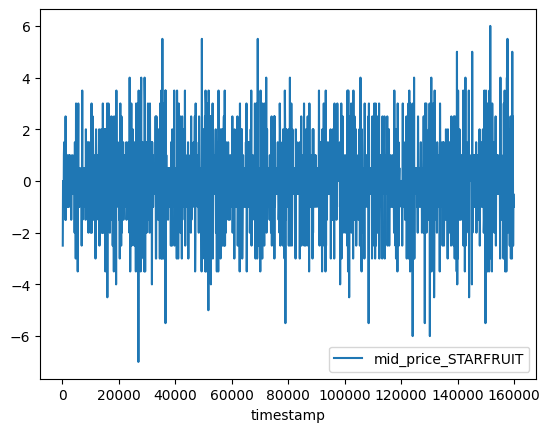

In [66]:
train_data_diff = train_data.diff().dropna()
train_data_diff.plot()

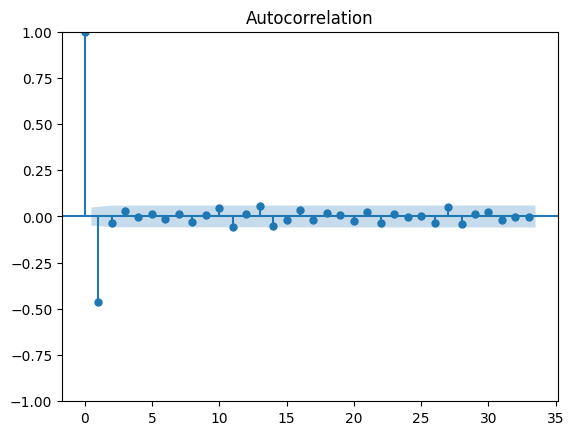

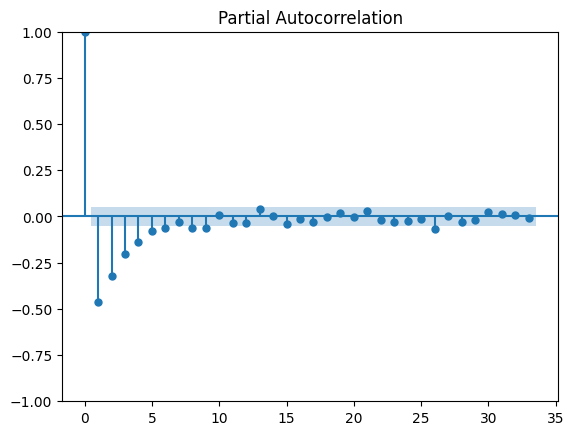

In [67]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_original = plot_acf(train_data_diff)

pacf_original = plot_pacf(train_data_diff)

In [68]:
adf_test = adfuller(train_data_diff, autolag = 'AIC')


print("1. ADF: ", adf_test[0])
print("2. p-value: ", adf_test[1])
print("3. Num of Lags: ", adf_test[2])
print("4. Num of observations used for ADF :", adf_test[3])
print("5. Critical value: ")
for key, val in adf_test[4].items():
  print("\t", key, ": ", val)

1. ADF:  -18.853118212062135
2. p-value:  0.0
3. Num of Lags:  8
4. Num of observations used for ADF : 1590
5. Critical value: 
	 1% :  -3.4344694268256246
	 5% :  -2.863359483478656
	 10% :  -2.5677386582809225


In [73]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data, order = (0,1,1))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                SARIMAX Results                                
Dep. Variable:     mid_price_STARFRUIT   No. Observations:                 1600
Model:                  ARIMA(0, 1, 1)   Log Likelihood               -2757.368
Date:                 Wed, 03 Apr 2024   AIC                           5518.737
Time:                         14:40:53   BIC                           5529.491
Sample:                              0   HQIC                          5522.730
                                - 1600                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7365      0.017    -43.152      0.000      -0.770      -0.703
sigma2         1.8413      0.051     35.814      0.000       1.741       1.942
Ljung-Box (L1) (Q):                   0.00  

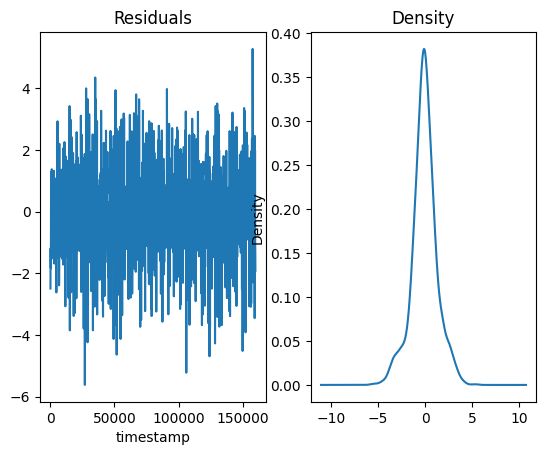

In [74]:
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title = "Residuals", ax = ax[0])
residuals.plot(title = "Density", kind = 'kde', ax = ax[1])
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-76-1a609e67f88a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['forecast_manual'] = [None]*len(train_data) + list(forecast_test)


<Axes: xlabel='timestamp'>

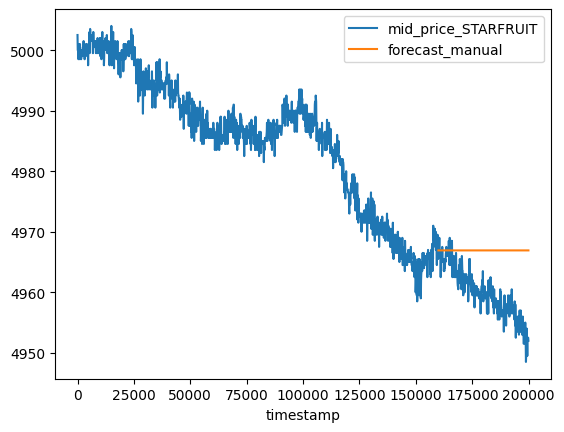

In [76]:
forecast_test = model_fit.forecast(len(test_data))
y['forecast_manual'] = [None]*len(train_data) + list(forecast_test)
y.plot()

In [79]:
!pip install pmdarima

In [80]:
import pmdarima as pm
auto_arima = pm.auto_arima(train_data, stepwise = False, seasonal = False)
auto_arima

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True)

In [82]:
print(auto_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1600
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -2754.537
Date:                Wed, 03 Apr 2024   AIC                           5515.074
Time:                        14:55:25   BIC                           5531.206
Sample:                             0   HQIC                          5521.065
                               - 1600                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0210      0.009     -2.398      0.017      -0.038      -0.004
ma.L1         -0.7425      0.017    -44.274      0.000      -0.775      -0.710
sigma2         1.8348      0.052     35.523      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-83-f5945a62ea05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['forecast_auto'] = [None]*len(train_data) + list(forecast_test_auto)


<Axes: xlabel='timestamp'>

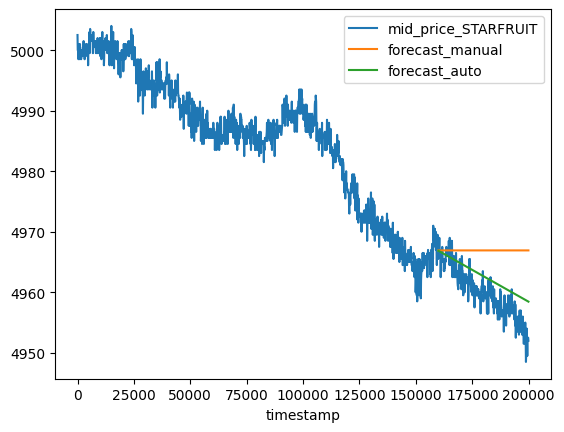

In [83]:
forecast_test_auto = auto_arima.predict(n_periods = len(test_data))
y['forecast_auto'] = [None]*len(train_data) + list(forecast_test_auto)
y.plot()

In [85]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test_data, forecast_test)
mape = mean_absolute_percentage_error(test_data, forecast_test)
rmse = np.sqrt(mean_squared_error(test_data, forecast_test))

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')

mae - manual: 7.046078227017251
mape - manual: 0.001421289129761461
rmse - manual: 8.140680804093453


In [86]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test_data, forecast_test_auto)
mape = mean_absolute_percentage_error(test_data, forecast_test_auto)
rmse = np.sqrt(mean_squared_error(test_data, forecast_test_auto))

print(f'mae - auto: {mae}')
print(f'mape - auto: {mape}')
print(f'rmse - auto: {rmse}')

mae - auto: 2.913691918805098
mape - auto: 0.000587714416353186
rmse - auto: 3.436192484346275
